In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

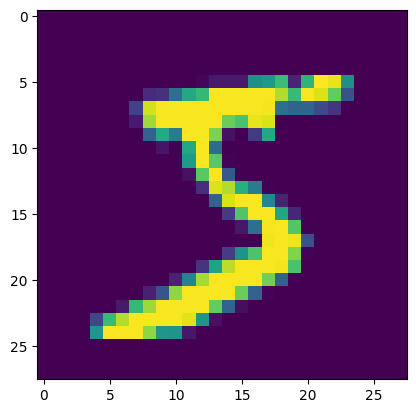

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255

In [6]:
X_test = X_test/255

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.3)

Epoch 1/25
1313/1313 [==============================] - 19s 12ms/step - loss: 0.3078 - accuracy: 0.9106 - val_loss: 0.1683 - val_accuracy: 0.9494
Epoch 2/25
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1292 - accuracy: 0.9614 - val_loss: 0.1362 - val_accuracy: 0.9593
Epoch 3/25
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0899 - accuracy: 0.9732 - val_loss: 0.1197 - val_accuracy: 0.9654
Epoch 4/25
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0665 - accuracy: 0.9796 - val_loss: 0.0985 - val_accuracy: 0.9703
Epoch 5/25
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0526 - accuracy: 0.9830 - val_loss: 0.1251 - val_accuracy: 0.9638
Epoch 6/25
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0429 - accuracy: 0.9864 - val_loss: 0.1196 - val_accuracy: 0.9668
Epoch 7/25
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.1075 - val_accurac

In [11]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
y_pred = y_prob.argmax(axis=1)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9751

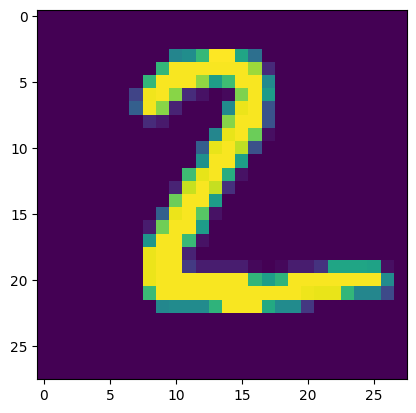

In [14]:
plt.imshow(X_test[1])

In [15]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 26ms/step


array([2])

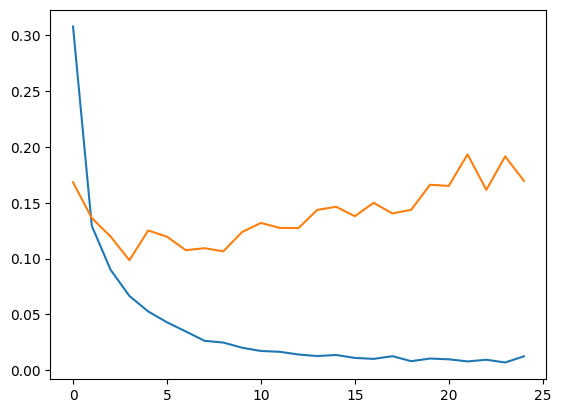

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])